# Exercise 2: Basic Statisics

## Task 1: Data Analysis with Pandas
Make sure you installed the pandas package. Download the Iris Plant Dataset from the UCI Machine Learning Repository:
https://archive.ics.uci.edu/ml/datasets/Iris


In [1]:
import numpy as np
import pandas as pd

### a) Preprocessing and Descriptive Statistics

Read the Iris dataset into a pandas dataframe. Note that you will need to name the columns yourself according to the _attribute information_ on the UCI website above. Print the dataframe and make sure your dataframe has 150 rows.

In [2]:
df = pd.read_csv("iris.data", names = ["sepal_length", "sepal_width"," petal_weight", "petal_width", "class"])
df

,sepal_length,sepal_width,petal_weight,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


Use pandas built-in functions to compute the mean, variance, minimum and maximum of the _sepal length_ of all plants in the datasets

In [3]:
print(df.sepal_length.mean())
print(df.sepal_length.var())
print(df.loc[:,"sepal_length"].min())
print(df.loc[:,"sepal_length"].max())

5.843333333333335
0.6856935123042505
4.3
7.9


Write a function that takes a (numerical) column of a pandas dataframe as input and computes its median. Use it to compute the median of the _petal width_ and compare it to the output of pandas built-in median function.

In [18]:
def median(col):
    m_ind = int((len(col)-1)/2)
    # convert to numpy to avoid hassle with panda index
    col = col.to_numpy()
    col.sort()
    return col[m_ind]
    
print(median(df.loc[:,"petal_width"]))
print(df.petal_width.median())

1.3
1.3


### b) Pearson's Correlation Coefficient

Write a function that takes two (numerical) pandas columns as input and returns their Pearson correlation coefficient. Do not use any pandas/numpy/scipy built-ins.

In [6]:
def pearson(x, y):
    n = len(x)
    x_hat, y_hat = sum(x)/n, sum(y)/n
    dx, dy = [v-x_hat for v in x], [v-y_hat for v in y]
    s_x, s_y = (sum(d**2 for d in dx)/n)**.5, (sum(d**2 for d in dy)/n)**.5
    
    return sum(dx[i]*dy[i]/n for i in range(n))/(s_x*s_y)

Apply your function to compute the correlation between _sepal length_ and _sepal width_. Check it for correctness by applying the corresponding scipy built-in. 

In [7]:
from scipy.stats import pearsonr

print(pearson(df.sepal_length,df.sepal_width))
print(pearsonr(df.sepal_length,df.sepal_width))

-0.10936924995064931
(-0.10936924995064935, 0.1827652152713665)


### c) Hypothesis Testing

Compute the mean _sepal width_ for all plants that are classed as _Iris-versicolor_ and for all plants that are classed as _Iris-virginica_ .

In [71]:
mean_setosa = df.loc[df.loc[:,"class"] == "Iris-versicolor"].sepal_width.mean()
mean_virginica = df.loc[df.loc[:,"class"] == "Iris-virginica"].sepal_width.mean()


print(mean_setosa)
print(mean_virginica)

2.7700000000000005
2.9739999999999998


Consider the null hypothesis that there is no difference in the means of the groups. Compute the corresponding _p_-value by shuffling the class labels 100000 times and computing the difference in means each of these times. Do you oberve a significant difference?

In [72]:
mean_diff = mean_setosa-mean_virginica
print(mean_diff)

col = df.loc[df.loc[:,"class"] != "Iris-setosa","sepal_width"].to_numpy()

ct = 0
for i in range(100000):
    np.random.shuffle(col)
    diff = np.mean(col[:50]) - np.mean(col[50:])
    if diff < mean_diff:
        ct+=1
p_value = ct/10000
print("Empirical p-value: " + str(p_value))

-0.2039999999999993
Empirical p-value: 0.0087


### d) The Bootstrap

We consider the _sepal width_ of all plants in the data that are classed as _Iris-setosa_. Compute the 95% confidence interval of their mean by bootstrapping the data 10000 times. 

In [6]:
from random import choices
sw = df.loc[df.loc[:,"class"] == "Iris-setosa","sepal_width"].to_numpy()
print(np.mean(sw))
means = []
for i in range(10000):
    sample = sw[choices(range(50), k=50)]
    means.append(np.mean(sample))
    
means = np.sort(means)
print("Confidence interval: (" + str(means[249]) +","+ str(means[9749]) + ")")

3.418
Confidence interval: (3.316,3.5239999999999996)


## Task 2: A Dice Game

Consider the following game of dices: You roll 5 dice, and you get points for each die you roll.
For each one, you get 100 points, for each six, you get 60 points, for all other numbers just the shown value (e.g., you get 3 points for a 3). Your total score is the sum of these points.

### a) Simulation and Plotting

Simulate the game 100,000 times, and save both every single dice roll as well as the resulting score for each of the 100000 rounds. Plot a histogram of outcomes.

In [7]:
scores = np.array([0,100,2,3,4,5,60])
def score_roll(roll):
    return np.sum(scores[roll])


#roll 100,000 times and store the results in an array
rolls = [choices(range(1,7),k=5) for _ in range(100000)]
scores = [score_roll(roll) for roll in rolls]

scores[:10]

[323, 73, 460, 114, 266, 166, 170, 74, 14, 115]

(array([1.5400e+03, 8.6540e+03, 2.8670e+03, 1.5000e+01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 7.2000e+01, 6.8780e+03, 9.2300e+03, 3.8600e+02,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        4.2820e+03, 1.1257e+04, 9.7800e+02, 5.0500e+02, 6.4260e+03,
        1.2900e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.6000e+02, 1.0852e+04, 5.1960e+03, 0.0000e+00,
        8.0500e+02, 1.3220e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        4.2220e+03, 4.0860e+03, 0.0000e+00, 1.1880e+03, 5.0620e+03,
        0.0000e+00, 0.0000e+00, 2.6800e+02, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 3.6200e+02, 5.3340e+03, 3.7100e+02, 0.0000e+00,
        7.5300e+02, 2.1600e+02, 0.0000e+00, 0.0000e+00, 1.8000e+01,
        1.7150e+03, 3.8000e+02, 0.0000e+00, 7.1700e+02, 8.2000e+02,
        0.0000e+00, 0.0000e+00, 6.6000e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.7400e+02, 7.5900e+02, 0.00

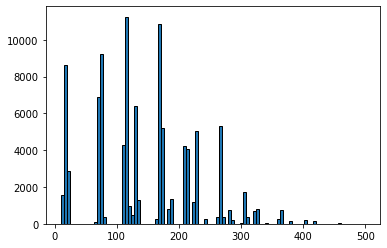

In [9]:
# use matplotlib/pyplot
from matplotlib import pyplot as plt
%matplotlib inline
plt.hist (scores, bins=100, edgecolor='black')

### b) Hypothesis Testing pt. 2
Assume that in your initial roll, you scored 268. Is this signficantly above what is to be expected? Compute the corresponding _p_-value.

In [13]:
p_value = np.sum([1 for x in scores if x >= 268]) / len(scores)
print(p_value) # p>0.05, thus no significant effect

0.0859


### c) Conditional Probability and Bayes Theorem

Based on your simulation, give an estimation of the probability of scoring over 100 points, given that you did not roll a single 1.

In [14]:
# probability of scoring over 150 points without rolling a 1
p1 = sum(1 if scores[i] > 100 and 1 not in rolls[i] else 0 for i in range(100000))/100000

# probability of not rolling a 1
p2 = sum(1 if 1 not in roll else 0 for roll in rolls)/10000

p_cond = p1/p2

print("P(score>100|no 1 rolled) = " + str(p_cond))

P(score>100|no 1 rolled) = 0.02640282053828583


Now estimate the probability of scoring over 100 points, and apply your previous results and Bayes Theorem to compute the probability of not rolling a 1 given that you score over 100 points.

In [15]:
p3 = sum(1 if score > 100 else 0 for score in scores)/100000

print("P(no 1 rolled | score>100) = " + str(p_cond*p2/p3))

P(no 1 rolled | score>100) = 0.1511413058927201
